# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Kadek Dwita Putri Suastini
- **Email:** putrisuastini22@gmail.com
- **ID Dicoding:** dwitaputri

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah penyewaan sepeda tiap hari dan jamnya?
- Bagaimana tren perkembangan jumlah penyewaan sepeda?
- Bagaimana jumlah penyewaan sepeda pada hari dan jam tertentu?
- Bagaimana jumlah penyewaan sepeda pada weekend dan weekday?
- Bagaimana jumlah penyewaan pengguna casual dan registered?
- Kapan terakhir kali sepeda disewa?
- Hari apa sepeda paling sering disewa?
- Bagaimana total penyewaan di setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [236]:
#import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [237]:
#memuat tabel dari file csv, yang pertama adalah untuk file hour.csv
hours_df = pd.read_csv('/content/sample_data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdiri dari 17 kolom, yaitu instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathershit, temp, atemp, hum, windspeed, casual, registered, dan cnt.
- Nilai dan penjelasan untuk tiap kolomnya adalah sebagai berikut:
  - **instant**: record index
  - **dteday**: date
  - **season**: season (1:spring, 2:summer, 3:fall, 4:winter)
  - **yr**: year (0: 2011, 1:2012)
  - **mnth**: month (1 to 12)
  - **hr**: hour (0 to 23)
  - **holiday**: whether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - **weekday**: day of the week
  - **workingday**: if the day is neither a weekend nor a holiday, it's 1; otherwise, it's 0
  - **weathersit**:
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - **temp**: Normalized temperature in Celsius (divided by 41, the max)
  - **atemp**: Normalized feeling temperature in Celsius (divided by 50, the max)
  - **hum**: Normalized humidity (divided by 100, the max)
  - **windspeed**: Normalized wind speed (divided by 67, the max)
  - **casual**: count of casual users
  - **registered**: count of registered users
  - **cnt**: count of total rental bikes (including both casual and registered)

In [238]:
#yang kedua adalah memuat file day.csv
days_df = pd.read_csv('/content/sample_data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdiri dari 16 kolom, yaitu instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathershit, temp, atemp, hum, windspeed, casual, registered, dan cnt.
- Nilai dan penjelasan untuk tiap kolomnya adalah sebagai berikut:
  - **instant**: record index
  - **dteday**: date
  - **season**: season (1:spring, 2:summer, 3:fall, 4:winter)
  - **yr**: year (0: 2011, 1:2012)
  - **mnth**: month (1 to 12)
  - **holiday**: whether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - **weekday**: day of the week
  - **workingday**: if the day is neither a weekend nor a holiday, it's 1; otherwise, it's 0
  - **weathersit**:
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - **temp**: Normalized temperature in Celsius (divided by 41, the max)
  - **atemp**: Normalized feeling temperature in Celsius (divided by 50, the max)
  - **hum**: Normalized humidity (divided by 100, the max)
  - **windspeed**: Normalized wind speed (divided by 67, the max)
  - **casual**: count of casual users
  - **registered**: count of registered users
  - **cnt**: count of total rental bikes (including both casual and registered)
- Saya memutuskan untuk menggunakan hour.csv karena jumlah kolom yang lebih banyak (hr) sehingga saya bisa melakukan analisis lebih detail terhadap peminjaman sepeda.

### Assessing Data

In [239]:
#memeriksa tiap tipe data dari kolom yang ada
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat **17 kolom**, dengan total **17379 non-null data**.
- **Semua bernilai sama untuk non-null data**, yaitu 17379. Artinya tidak ada data yang null atau missing value.
- Masih terdapat **kesalahan tipe data yaitu pada kolom dteday yang menggunakan tipe data object**. Selanjutnya akan diubah menjadi tipe data datetime. Meskipun data pada kolom dteday hanya berupa tanggal tanpa waktu, penggunaan datetime tidak akan memberikan masalah.

In [240]:
#memeriksa apakah ada data null atau missing value
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- **Tidak ada data null** pada setiap kolom.

In [241]:
#memeriksa apakah ada data duplikat
hours_df.duplicated().sum()

0

**Insight:**
- **Tidak ada data duplikat** pada hours_df.

In [242]:
#memeriksa paramter statistik dari dari kolom numerik
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat total 17379 baris data
- Rata-rata penyewaan (cnt) adalah 189.46
- Rata-rata pengguna casual adalah 35.86, registered 153.79
- Penyewaan tertinggi adalah 977, penyewaan terendah adalah 1
- Deviasi strandar cnt adalah 181.39
- Nilai min dan max season benar, yaitu 1 dan 4
- Nilai min dan max yr benar yaitu 0 dan 1
- Nilai min dan max mnth benar yaitu 1 dan 12
- Nilai min dan max hr benar yaitu 0 dan 23
- Nilai min dan max holiday benar yaitu 0 dan 1
- Nilai min dan max weekday benar yaitu 0 dan 6
- Nilai min dan max workingday benar yaitu 0 dan 1
- Nilai min dan max weathersit benar yaitu 1 dan 4
- Nilai min dan max temp benar
- Nilai min atemp, hum, dan windspeed mencurigakan karena bernilai 0
- Untuk kolom categorical yang diwakilkan oleh numerik, maka nilai mmeannya akan menghasilkan nilai yang rancu. Misalnya, terdapat 3 data, yaitu spring, fall, fall, fall, dan winter, yaitu 1, 3, 3, dan 4. Rata-ratanya adalah 11/5 yaitu 2.2 yang jika dibulatkan ke bawah adalah 2 (summer) sehingga tidak mewakili dengan tepat

In [243]:
#memeriksa data dengan nilai atemp = 0
hours_df[hours_df.atemp == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


**Insight:**
- Dijelaskan pada file readme dataset, bahwa atemp berarti Normalized feeling temperature in Celsius. The values are divided to 50 (max). Artinya, nilai atemp = 0 adalah tidak mungkin. Oleh karenanya, **nilai ini perlu diperbaiki**.

In [244]:
#menghitung jumlah baris data dengan nilai atemp = 0
(hours_df.atemp == 0).sum()

2

**Insight:**
- Terdapat 2 baris data dengan atemp = 0.

In [245]:
#memeriksa data dengan nilai hum = 0
hours_df[hours_df.hum == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


**Insight:**
- Dijelaskan pada file readme dataset, bahwa hum berarti Normalized humidity. The values are divided to 100 (max). Di alam dengan nilai atmosfer normal, tidak akan ditemukan nilai humidity = 0. Oleh karenanya **nilai ini perlu diperbaiki**.

In [246]:
#menghitung jumlah baris data dengan nilai hum = 0
(hours_df.hum == 0).sum()

22

**Insight:**
- Terdapat 22 baris data dengan hum = 0.

In [247]:
#memeriksa data dengan nilai windspeed = 0
hours_df[hours_df.windspeed == 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


**Insight:**
- Dijelaskan pada file readme dataset, bahwa windspeed berarti Normalized wind speed. The values are divided to 67 (max). Tidak seperti yang lainnya, nilai windspeed = 0 sangat mungkin terjadi. Nilai windspeed = 0 berarti tidak ada pergerakan udara di lokasi tertentu yang biasa disebut dengan istilah tenang (calm) atau udara ringan (ligh air). Selain itu, melihat jumlah data dengan nilai windspeed = 0 yang berjumlah 2180 baris, maka semakin besar kemungkinan bahwa nilai 0 bukanlah karena kesalahan data. Oleh karenanya, **nilai ini tidak perlu diperbaiki**.

In [248]:
#menghitung jumlah baris data dengan nilai windspeed = 0
(hours_df.windspeed == 0).sum()

2180

**Insight:**
- Terdapat 2180 baris data dengan windspeed = 0.

In [249]:
#memeriksa data dengan nilai cnt tertinggi (max)
hours_df[hours_df.cnt == hours_df.cnt.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


**Insight:**
- **Hal wajar mendapatkan jumlah penyewa atau pengguna sepeda sampai 977**.
- Alasan wajar: **[1]** Terjadi pada musim gugur atau fall (season = 3), **[2]** Terjadi pada jam sibuk yaitu 18.00 atau 6 sore di mana orang umumnya pulang kerja atau beraktivitas lainnya (hr = 18), **[3]** Terjadi pada bukan hari libur melainkan hari kerja yaitu Rabu (holiday = 0, weekday = 3, workingday = 1), **[4]** Cuaca mendukung untuk bersepeda yaitu Clear, Few clouds, Partly cloudy, Partly cloudy (weathersit = 1)


In [250]:
#memeriksa data dengan nilai cnt terendah (min)
hours_df[hours_df.cnt == hours_df.cnt.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
30,31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1
49,50,2011-01-03,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1
71,72,2011-01-04,1,0,1,2,0,2,1,1,0.14,0.1515,0.63,0.1343,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1
17215,17216,2012-12-25,1,1,12,4,1,2,0,2,0.24,0.2576,0.87,0.0896,0,1,1
17237,17238,2012-12-26,1,1,12,2,0,3,1,2,0.26,0.2273,0.65,0.2985,0,1,1
17262,17263,2012-12-27,1,1,12,3,0,4,1,2,0.24,0.2273,0.87,0.2239,0,1,1


**Insight:**
- **Hal wajar mendapatkan jumlah penyewa atau pengguna sepeda minim yaitu 1**.
- Alasan wajar: **[1]** Dipengaruhi oleh season dan cuaca. Misalnya weathersit = 2 yaitu Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, atau kecepatan angin yang rendah yang menandakan cukup dingin untuk beraktivitas, **[2]** Dipengaruhi oleh waktu, misalnya pukul 4, 2, 3, dan sebagainya yang menandakan waktu pagi buta.

**Kesimpulan Proses Assessing Data:**
- **Tipe data dteday masih menggunakan object (perlu diperbaiki pada tahap cleaning)**, seharusnya datetime. Tipe data untuk kolom lainnya sudah benar.
- Tidak ada data null maupun duplikat.
- Hampir semua parameter yang didapat dari describe() bernilai normal.
- **Nilai atemp dan hum = 0 adalah tidak wajar atau inaccurate value (perlu diperbaiki pada tahap cleaning)**.
- Nilai windspeed = 0 adalah wajar.
- Nilai min = 1 dan max = 977 untuk jumlah pengguna sepeda adalah wajar.


### Cleaning Data

In [251]:
#mengganti tipe data pada kolom dteday menjadi datetime
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data dteday telah diubah menjadi datetime

In [252]:
#mengatasi inaccurate value pada kolom hum dengan menggunakan metode imputation. Untuk menghindari outlier,maka digunakan median dan untuk menyesuaikan cuaca dengan season maka nilai dikelompokkan berdasarkan seasonnya
hours_df['hum'] = hours_df['hum'].mask(hours_df['hum'] == 0).fillna(hours_df.groupby('season')['hum'].transform('median'))
#saya mengecualikan tipe data datetime karena menggunakan describe, dteday adalah datetime dan seharusnya tidak mengalami perhitungan numerik atau statistik dengan describe
print(hours_df.describe(exclude=['datetime64[ns]']))

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Nilai minimum dari hum sudah berubah dari 0 menjadi 0.080

In [253]:
#mengatasi inaccurate value pada kolom atemp dengan menggunakan metode imputation. Untuk menghindari outlier,maka digunakan median dan untuk menyesuaikan cuaca dengan season maka nilai dikelompokkan berdasarkan seasonnya
hours_df['atemp'] = hours_df['atemp'].mask(hours_df['atemp'] == 0).fillna(hours_df.groupby('season')['atemp'].transform('median'))
print(hours_df.describe(exclude=['datetime64[ns]']))

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Nilai minimum dari atemp sudah berubah dari 0 menjadi 0.0152

## Exploratory Data Analysis (EDA)

### Explore Data hours_df

In [254]:
hours_df.describe(include="all")
#standar deviasi dteday bernilai NaN karena bertipe datetime

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475808,0.627938,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171786,0.191648,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Terdapat total 17379 baris data
- Rata-rata penyewaan (cnt) adalah 189.46
- Rata-rata pengguna casual adalah 35.86, registered 153.79
- Penyewaan tertinggi adalah 977, penyewaan terendah adalah 1
- Deviasi strandar cnt adalah 181.39
- Nilai min dan max season benar, yaitu 1 dan 4
- Nilai min dan max yr benar yaitu 0 dan 1
- Nilai min dan max mnth benar yaitu 1 dan 12
- Nilai min dan max hr benar yaitu 0 dan 23
- Nilai min dan max holiday benar yaitu 0 dan 1
- Nilai min dan max weekday benar yaitu 0 dan 6
- Nilai min dan max workingday benar yaitu 0 dan 1
- Nilai min dan max weathersit benar yaitu 1 dan 4
- Nilai min dan max temp, atemp, hum, dan windspeed sudah benar
- Untuk kolom categorical yang diwakilkan oleh numerik, maka nilai mmeannya akan menghasilkan nilai yang rancu. Misalnya, terdapat 3 data, yaitu spring, fall, fall, fall, dan winter, yaitu 1, 3, 3, dan 4. Rata-ratanya adalah 11/5 yaitu 2.2 yang jika dibulatkan ke bawah adalah 2 (summer) sehingga tidak mewakili dengan tepat

In [255]:
hours_df.groupby('hr').agg({'cnt': ['sum', 'mean', 'min', 'max', 'std']}).reset_index()

hr     cnt                                 
           sum        mean min  max         std
0    0   39130   53.898072   2  283   42.307910
1    1   24164   33.375691   1  168   33.538727
2    2   16352   22.869930   1  132   26.578642
3    3    8174   11.727403   1   79   13.239190
4    4    4428    6.352941   1   28    4.143818
5    5   14261   19.889819   1   66   13.200765
6    6   55132   76.044138   1  213   55.084348
7    7  154171  212.064649   1  596  161.441936
8    8  261001  359.011004   5  839  235.189285
9    9  159438  219.309491  14  426   93.703458
10  10  126257  173.668501   8  539  102.205413
11  11  151320  208.143054  10  663  127.495536
12  12  184414  253.315934   3  776  145.081134
13  13  184919  253.661180  11  760  148.107657
14  14  175652  240.949246  12  750  147.271574
15  15  183149  251.233196   7  750  144.632541
16  16  227748  311.983562  11  783  148.682618
17  17  336860  461.452055  15  976  232.656611
18  18  309772  425.510989  23  977  224.639304
19  19  226789  311.523352  11  743  161.050359
20  20  164550  226.030220  11  567  119.670164
21  21  125445  172.314560   6  584   89.788893
22  22   95612  131.335165   9  502   69.937782
23  23   63941   87.831044   2  256   50.846889

**Insight:**
- Penyewaan tertinggi pada pukul 17 dengan total 336860 penyewa, diikuti oleh pukul 18 sebanyak 399772 dan 16 sebanyak 227748.
- Sepeda banyak disewa mendekati jam pulang kerja.

In [256]:
#membuat mapping untuk hari
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

#group by dan menggunakan mapping
daily_hours_df = (
    hours_df.groupby([hours_df['weekday'].map(day_mapping), 'hr', 'dteday']).agg({'cnt': ['sum', 'mean', 'min', 'max', 'std']}).reset_index()
)

#mengubah nama kolom agar lebih mudah dipahami tanpa mengubah pada hours_df
daily_hours_df.columns = ['weekday', 'hour', 'dteday', 'sum_cnt',  'mean_cnt', 'min_cnt', 'max_cnt', 'std_cnt']

#order
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#sorting dengan categorical
daily_hours_df['weekday'] = pd.Categorical(daily_hours_df['weekday'], categories=weekday_order, ordered=True)

#sorting
daily_hours_df = daily_hours_df.sort_values(['weekday', 'hour'])

#menampilkan hasilnya
print(daily_hours_df)

       weekday  hour     dteday  sum_cnt  mean_cnt  min_cnt  max_cnt  std_cnt
7478    Sunday     0 2011-01-02       17      17.0       17       17      NaN
7479    Sunday     0 2011-01-09       25      25.0       25       25      NaN
7480    Sunday     0 2011-01-16       39      39.0       39       39      NaN
7481    Sunday     0 2011-01-23       22      22.0       22       22      NaN
7482    Sunday     0 2011-01-30       33      33.0       33       33      NaN
...        ...   ...        ...      ...       ...      ...      ...      ...
7473  Saturday    23 2012-12-01      126     126.0      126      126      NaN
7474  Saturday    23 2012-12-08      162     162.0      162      162      NaN
7475  Saturday    23 2012-12-15      119     119.0      119      119      NaN
7476  Saturday    23 2012-12-22       40      40.0       40       40      NaN
7477  Saturday    23 2012-12-29       32      32.0       32       32      NaN

[17379 rows x 8 columns]


**Insight:**
- Semuanya tampak normal, kecuali nilai std_cnt yang bernilai NaN.
- Namun karena jumlah row sebanyak 17379, maka akan lebih mudah mendapatkan insight dengan menggunakan visualisasi. Jumlah row bisa dikurangi apabila tidak menggunakan groupby dteday. Sayannya, hal ini sulit karena dteday akan digunakan acuan untuk melakukan filter pada dashboard. Kecuali membuat df secara terpisah, yaitu 1 df tanpa dteday, dan 1 df dengan dteday.

In [257]:
#menemukan penyebab nilai std = 0
group_size = hours_df.groupby([hours_df['weekday'].map(day_mapping), 'hr', 'dteday']).size()

print(group_size[group_size == 1])

weekday    hr  dteday    
Friday     0   2011-01-07    1
               2011-01-14    1
               2011-01-21    1
               2011-01-28    1
               2011-02-04    1
                            ..
Wednesday  23  2012-11-28    1
               2012-12-05    1
               2012-12-12    1
               2012-12-19    1
               2012-12-26    1
Length: 17379, dtype: int64


**Insight:**
- Kombinasi group size bernilai 1 yang artinya tedapat 17379 row dari kommbinasi weekday, hour, dan dteday yang tercatat 1 penyewaan saja.
- Karena tidak  ada variasi, nilai std menjadi NaN. Oleh karenanya, nilai std tidak akan digunakan kedepannya.

In [258]:
#membuat mapping untuk weekend dan weekday
day_type_mapping = {
    0: 'Weekend',  #sunday
    1: 'Weekday',  #monday
    2: 'Weekday',  #tuesday
    3: 'Weekday',  #wednesday
    4: 'Weekday',  #thursday
    5: 'Weekday',  #friday
    6: 'Weekend'   #saturday
}

#group by dan menggunakan mapping
day_type_hours_df = (
    hours_df.groupby([hours_df['weekday'].map(day_type_mapping), 'hr', 'dteday']).agg({'cnt': ['sum', 'mean', 'min', 'max']}).reset_index()
)

#mengubah nama kolom agar lebih mudah dipahami tanpa mengubah pada hours_df
day_type_hours_df.columns = ['day_type', 'hour', 'dteday', 'sum_cnt',  'mean_cnt', 'min_cnt', 'max_cnt']

#menampilkan hasilnya
print(day_type_hours_df)


      day_type  hour     dteday  sum_cnt  mean_cnt  min_cnt  max_cnt
0      Weekday     0 2011-01-03        5       5.0        5        5
1      Weekday     0 2011-01-04        5       5.0        5        5
2      Weekday     0 2011-01-05        6       6.0        6        6
3      Weekday     0 2011-01-06       11      11.0       11       11
4      Weekday     0 2011-01-07       17      17.0       17       17
...        ...   ...        ...      ...       ...      ...      ...
17374  Weekend    23 2012-12-16       33      33.0       33       33
17375  Weekend    23 2012-12-22       40      40.0       40       40
17376  Weekend    23 2012-12-23       25      25.0       25       25
17377  Weekend    23 2012-12-29       32      32.0       32       32
17378  Weekend    23 2012-12-30       49      49.0       49       49

[17379 rows x 7 columns]


**Insight:**
- Semuanya tampak normal. Namun karena jumlah row sebanyak 17379, maka akan lebih mudah mendapatkan insight dengan menggunakan visualisasi. Jumlah row bisa dikurangi apabila tidak menggunakan groupby dteday. Sayangnya, hal ini sulit karena dteday akan digunakan acuan untuk melakukan filter pada dashboard. Kecuali membuat df secara terpisah, yaitu 1 df tanpa dteday, dan 1 df dengan dteday.

In [259]:
#membuat mapping untuk day
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

#group by dan menggunakan mapping
cust_type_df = (
    hours_df.groupby([hours_df['weekday'].map(day_mapping), 'hr', 'dteday']).agg({
        'casual': ['sum', 'mean', 'min', 'max'],
        'registered': ['sum', 'mean', 'min', 'max']
    }).reset_index()
)

#mengubah nama kolom agar lebih mudah dipahami tanpa mengubah pada hours_df
cust_type_df.columns = ['weekday', 'hour', 'dteday', 'casual_sum', 'casual_mean', 'casual_min', 'casual_max', 'registered_sum',
                        'registered_mean', 'registered_min', 'registered_max']

# order
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#sorting dengan categorical
cust_type_df['weekday'] = pd.Categorical(cust_type_df['weekday'], categories=weekday_order, ordered=True)

#sorting
cust_type_df = cust_type_df.sort_values(['weekday', 'hour'])

#menampilkan hasilnya
print(cust_type_df)

       weekday  hour     dteday  casual_sum  casual_mean  casual_min  \
7478    Sunday     0 2011-01-02           4          4.0           4   
7479    Sunday     0 2011-01-09           1          1.0           1   
7480    Sunday     0 2011-01-16           6          6.0           6   
7481    Sunday     0 2011-01-23           2          2.0           2   
7482    Sunday     0 2011-01-30           0          0.0           0   
...        ...   ...        ...         ...          ...         ...   
7473  Saturday    23 2012-12-01          10         10.0          10   
7474  Saturday    23 2012-12-08          18         18.0          18   
7475  Saturday    23 2012-12-15          11         11.0          11   
7476  Saturday    23 2012-12-22           3          3.0           3   
7477  Saturday    23 2012-12-29           0          0.0           0   

      casual_max  registered_sum  registered_mean  registered_min  \
7478           4              13             13.0              13 

**Insight:**
- Semuanya tampak normal. Namun karena jumlah row sebanyak 17379, maka akan lebih mudah mendapatkan insight dengan menggunakan visualisasi. Jumlah row bisa dikurangi apabila tidak menggunakan groupby dteday. Sayangnya, hal ini sulit karena dteday akan digunakan acuan untuk melakukan filter pada dashboard. Kecuali membuat df secara terpisah, yaitu 1 df tanpa dteday, dan 1 df dengan dteday.

In [260]:
# Groupby berdasarkan weekday dan hour
recency_df = hours_df.groupby(["weekday", "hr"], as_index=False).agg({
    "dteday": "max",
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})

# Menghitung recency berdasarkan tanggal penyewaan
recency_df["recency"] = recency_df["dteday"].apply(lambda x: (hours_df["dteday"].max() - x).days)

# Monetary berdasarkan jumlah penyewaan
recency_df["monetary"] = recency_df["cnt"]

# Frequency berdasarkan jumlah penyewaan dan jumlah tanggal unik
recency_df["frequency"] = recency_df["cnt"] / len(hours_df["dteday"].unique())

recency_df.head()


,weekday,hr,dteday,cnt,casual,registered,recency,monetary,frequency
0,0,0,2012-12-30,9775,1896,7879,1,9775,13.372093
1,0,1,2012-12-30,8053,1560,6493,1,8053,11.016416
2,0,2,2012-12-30,6286,1284,5002,1,6286,8.599179
3,0,3,2012-12-30,3239,870,2369,1,3239,4.430917
4,0,4,2012-12-30,955,258,697,1,955,1.306430


**Insight:**
- Penyewaan terbesar teradi pada 30 desember 2012 yaitu sebanyak 444027
- Pengguna registered konsisten lebih tinggi daripada casual
- Recency bernilai 0 artinya adalah penyewaan paling baru dalam data
- Monetary tinggi untuk periode tersebut
- Nilai frequency bervariasi dari 607.42 sampai dengan 664.01. Pada 27 Desember 2012, mmemiliki frequency tertinggi yaitu 664.01 yang artinya sepeda lebih sering digunakan pada hari tersebut jika dibandingkan dengan hari atau tanggal lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah penyewaan sepeda tiap hari dan jamnya?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

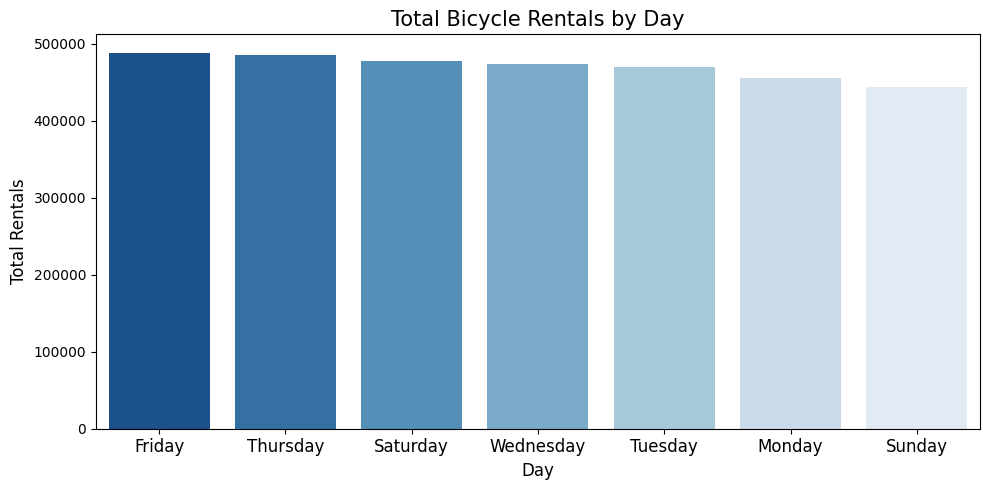

In [261]:
#menghitung total penyewaan sepeda dalam suatu hari (weekday)
daily_sum = daily_hours_df.groupby('weekday', observed=False)['sum_cnt'].sum().reindex(weekday_order)

#dataframe baru
byweekday_df = pd.DataFrame({
    "weekday": weekday_order,
    "rental_count": daily_sum.values
})

#membuat barchart
plt.figure(figsize=(10, 5))

sns.barplot(
    y="rental_count",
    x="weekday",
    hue="weekday",
    data=byweekday_df.sort_values(by="rental_count", ascending=False),
    palette="Blues_r",
    legend=False
)

#judul dan tampilan barchart
plt.title("Total Bicycle Rentals by Day", loc="center", fontsize=15)
plt.ylabel("Total Rentals", fontsize=12)
plt.xlabel("Day", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tight_layout()
plt.show()


**Insight:**
- Penyewaan terbesar terjadi pada hari jumat dan terendah terjadi pada hari minggu.
- Jika melihat dari weekend, sabtu ternyata lebih banyak dibandingkan minggu. Artinya, orang menghabiskan lebih  banyak waktu untuk menggunakan pada sabtu dibandingkan minggu.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

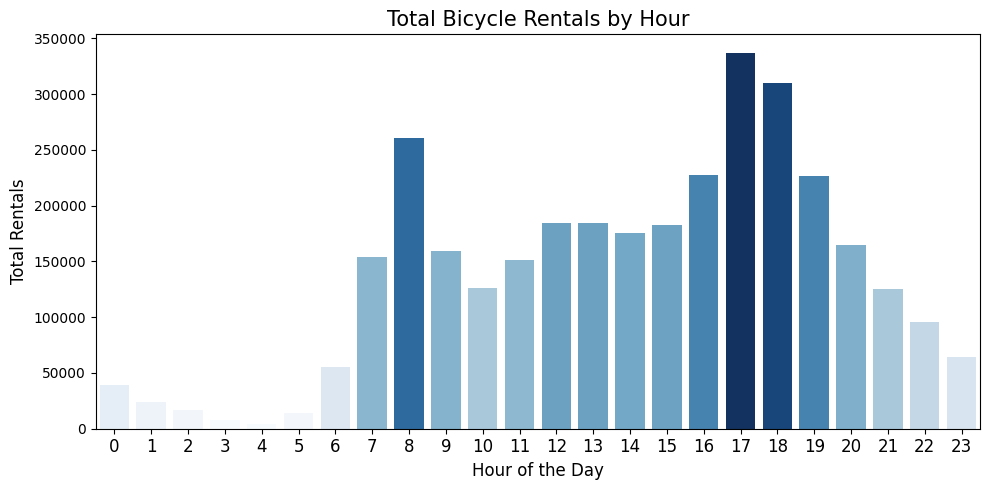

In [262]:
#menghitung total penyewaan sepeda dalam jam
hourly_sum = daily_hours_df.groupby('hour', observed=False)['sum_cnt'].sum()

#dataframe baru
byhour_df = pd.DataFrame({
    "hour": hourly_sum.index,
    "rental_count": hourly_sum.values
})

#membuat urutan jam 0-23, agar tidak teracak
byhour_df = byhour_df.sort_values(by="hour", ascending=True)

#palet warna
norm = plt.Normalize(byhour_df['rental_count'].min(), byhour_df['rental_count'].max())
colors = plt.cm.Blues(norm(byhour_df['rental_count']))

#konversi array menjadi list
colors_list = [plt.cm.Blues(norm(value)) for value in byhour_df['rental_count']]

#membuat barchart
plt.figure(figsize=(10, 5))

sns.barplot(
    y="rental_count",
    x="hour",
    hue="hour",
    data=byhour_df,
    palette=colors_list,
    legend=False
)

#judul dan tampilan barchart
plt.title("Total Bicycle Rentals by Hour", loc="center", fontsize=15)
plt.ylabel("Total Rentals", fontsize=12)
plt.xlabel("Hour of the Day", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tight_layout()

#menampilkan barchart
plt.show()


**Insight:**
- Penyewaan terbesar terjadi pada pukul 17, diikuti dengan 18 dan 8. Ketiga jam ini merupakan jam masyarakat memulai kegiatan dan mengakhiri kegiatan seperti berangkat dan pulang kantor.
- Pukul 0-5 sangat sedikit penyewa, sangat wajar karena masyarakat tidak banyak beraktivitas pada jam tersebut.

### Pertanyaan 2: Bagaimana tren perkembangan jumlah penyewaan sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


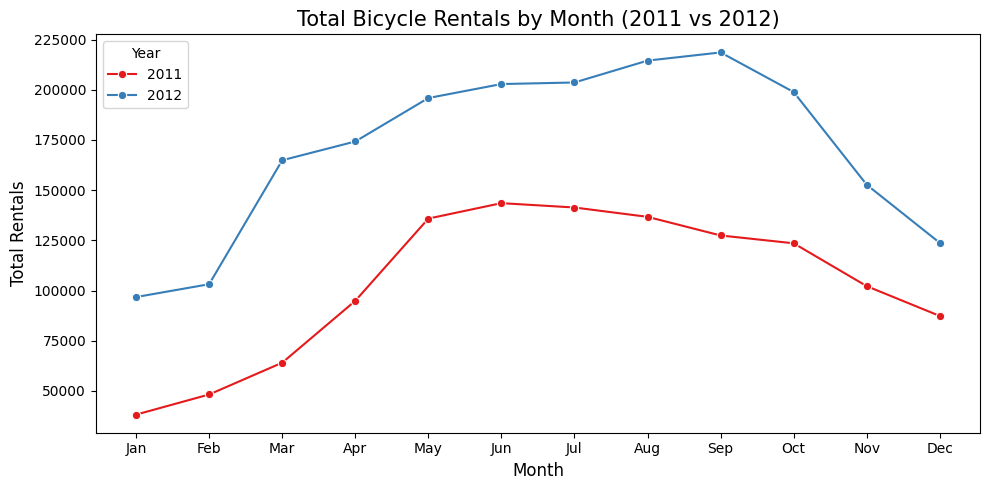

In [263]:
#map tahun 2011 dan 2012 karena pada hours df masih menggunakan 0 dan 1
hours_df['year'] = hours_df['yr'].map({0: 2011, 1: 2012})

#total penyewaan perbulan per tahunnya
monthly_sum_by_year = hours_df.groupby(['year', 'mnth'])['cnt'].sum().reset_index()

#membuat linechart
plt.figure(figsize=(10, 5))

sns.lineplot(
    x="mnth",
    y="cnt",
    hue="year",
    data=monthly_sum_by_year,
    marker="o",
    palette="Set1"
)

#judul dan tampilan linechart
plt.title("Total Bicycle Rentals by Month (2011 vs 2012)", loc="center", fontsize=15)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year", loc="upper left")
plt.tight_layout()

#menampilkan linechart
plt.show()


**Insight:**
- Penyewaan untuk seluruh bulan pada tahun 2012 lebih besar daripada 2011.
- Penyewaan tertinggi pada tahun 2011 terjadi pada bulan Juni, sedangkan pada tahun 2012 terjadi pada bulan September.
- Penyewaan terendah pada tahun 2011 terjadi pada bulan Januari, juga untuk tahun 2012 yang terjadi pada bulan Januari.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


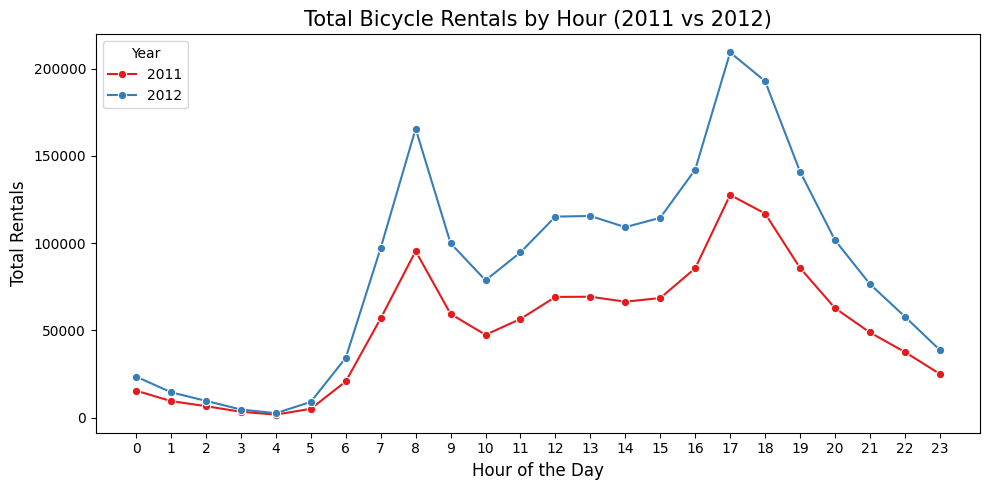

In [264]:
#map tahun 2011 dan 2012 karena pada hours df masih menggunakan 0 dan 1
hours_df['year'] = hours_df['yr'].map({0: 2011, 1: 2012})

#total penyewaan perjam per tahunnya
hourly_sum_by_year = hours_df.groupby(['year', 'hr'])['cnt'].sum().reset_index()

#membuat linechart
plt.figure(figsize=(10, 5))

sns.lineplot(
    x="hr",
    y="cnt",
    hue="year",
    data=hourly_sum_by_year,
    marker="o",
    palette="Set1"
)

#judul dan tampilan linechart
plt.title("Total Bicycle Rentals by Hour (2011 vs 2012)", loc="center", fontsize=15)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(ticks=range(0, 24))
plt.legend(title="Year", loc="upper left")
plt.tight_layout()

#menampilkan linechart
plt.show()

**Insight:**
- Baik tahun 2011 maupun 2012, penyewaan tertinggi secara berurutan terjadi pada pukul 17, 18, dan 8.
- Baik tahun 2011 maupun 2012, penyewaan terendah terjadi pada waktu tengah malah menjelang pagi hari.

### Pertanyaan 3: Bagaimana jumlah penyewaan sepeda pada hari dan jam tertentu?

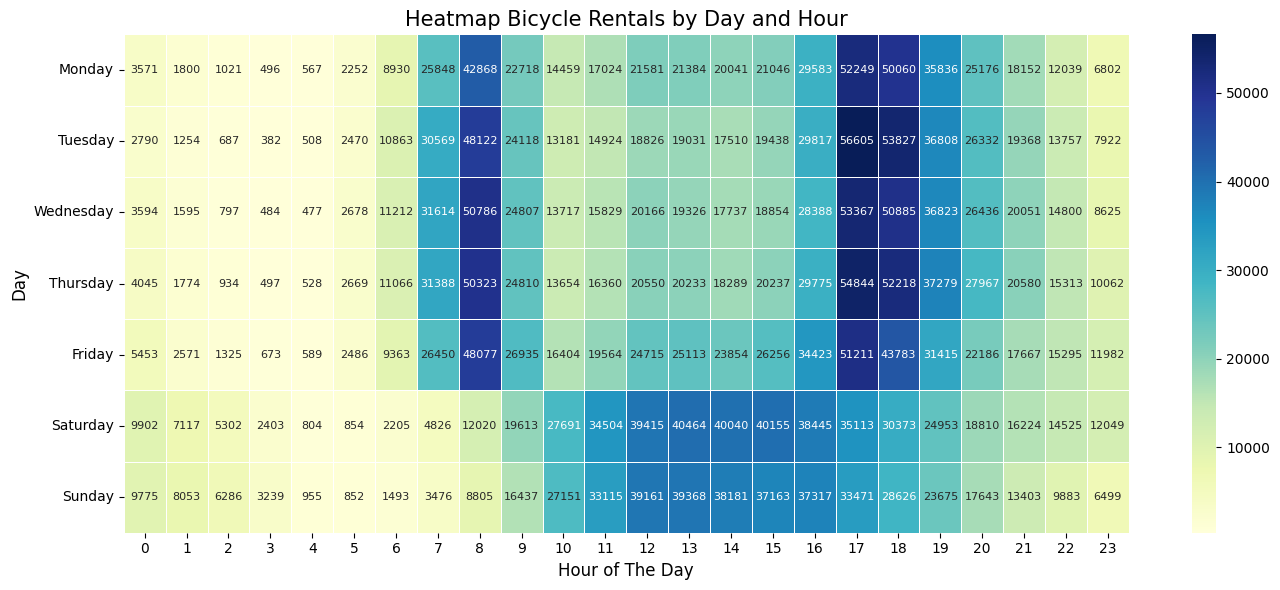

In [265]:
#urutan hari
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#pivot table dengan pengurutan berdasarkan ordered_days
heatmap_data = (
    hours_df.groupby([hours_df['weekday'].map(day_mapping), 'hr'])
    .agg({'cnt': 'sum'})
    .reset_index()
    .pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='sum')
)

#mengatur urutan berdasarkan ordered_days
heatmap_data = heatmap_data.reindex(ordered_days)

#membuat heatmap
plt.figure(figsize=(14, 6))

sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", annot_kws={"size": 8}, linewidths=0.5)

#judul dan tampilan heatmap
plt.title("Heatmap Bicycle Rentals by Day and Hour", loc="center", fontsize=15)
plt.xlabel("Hour of The Day", fontsize=12)
plt.ylabel("Day", fontsize=12)

#layout agar tidak saling tumpang tindih
plt.tight_layout()

#menampilkan heatmap
plt.show()


**Insight:**
- Penyewaan sepeda sering terjadi pada hari Jumat, Senin, Selasa, Rabu, dan Kamis pada pukul 8, 17, dan 18.
- Kendati seperti poin pertama, pada hari weekend, jumlah penyewa besar pada pukul 11 sampai dengan 16.
- Pukul 0-5 memiliki angka yang cukup kecil, kecuali hari Sabtu dan Minggu. Sabtu dan Minggu pada pukul 0 memiliki jumlah penyewa yang lebih besar daripada pukul 6 pagi untuk hari Jumat dan Senin.

### Pertanyaan 4: Bagaimana jumlah penyewaan sepeda pada weekend dan weekday?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


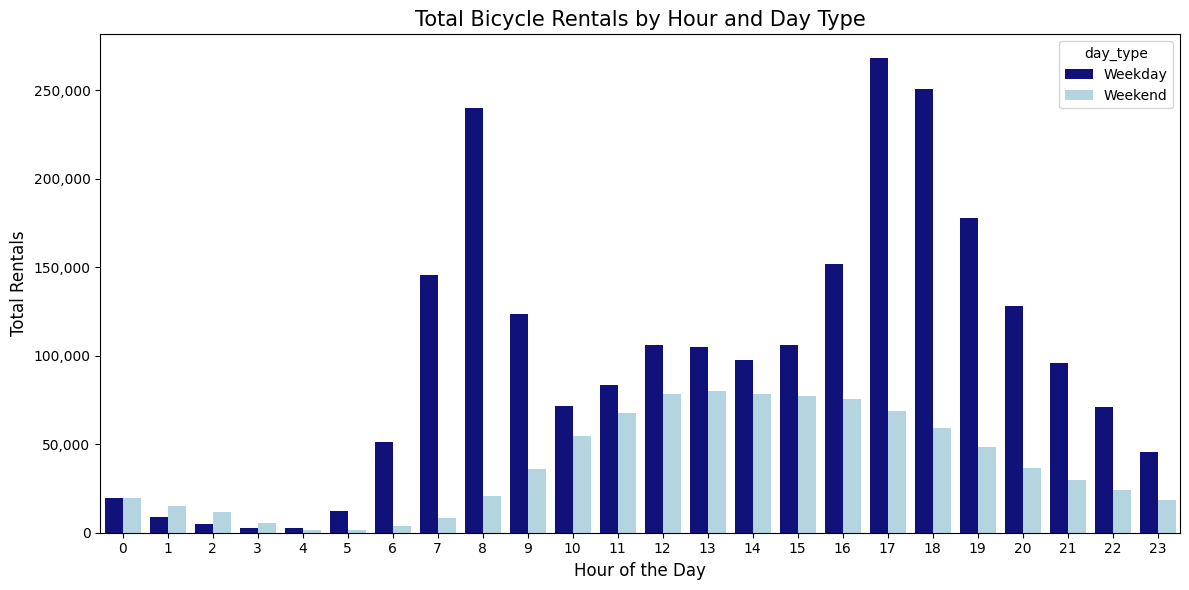

In [266]:
#menghitung total penyewaan sepeda dalam jam berdasarkan day_type (weekday/weekend)
hourly_day_type_sum = day_type_hours_df.groupby(['hour', 'day_type'], observed=False)['sum_cnt'].sum().reset_index()

#membuat dataframe baru
by_hour_day_type_df = pd.DataFrame({
    "hour": hourly_day_type_sum['hour'],
    "day_type": hourly_day_type_sum['day_type'],
    "rental_count": hourly_day_type_sum['sum_cnt']
})

#membuat urutan jam 0-23 agar tidak teracak
by_hour_day_type_df = by_hour_day_type_df.sort_values(by="hour", ascending=True)

# Palet warna yang sesuai dengan yang kamu inginkan (misalnya darkblue untuk weekday, lightblue untuk weekend)
palette = {
    "Weekday": "darkblue",
    "Weekend": "lightblue"
}

#membuat barchart total penyewaan berdasarkan jam dan tipe hari (weekday/weekend)
plt.figure(figsize=(12, 6))

sns.barplot(
    x="hour",
    y="rental_count",
    hue="day_type",
    data=by_hour_day_type_df,
    palette=palette,
    errorbar=None
)

#menambahkan judul dan label sumbu
plt.title("Total Bicycle Rentals by Hour and Day Type", loc="center", fontsize=15)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)

#mengatur sumbu y agar dalam format ribuan
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

#menyesuaikan layout agar lebih rapat
plt.tight_layout()

#menampilkan barchart
plt.show()

**Insight:**
- Untuk weekday, jumlah penyewa besar pada pukul 17, 18, 8.
- Untuk weekend, jumlah penyewa besar pada pukul 13, 12, dan 14.

### Pertanyaan 5: Bagaimana jumlah penyewaan pengguna casual dan registered?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


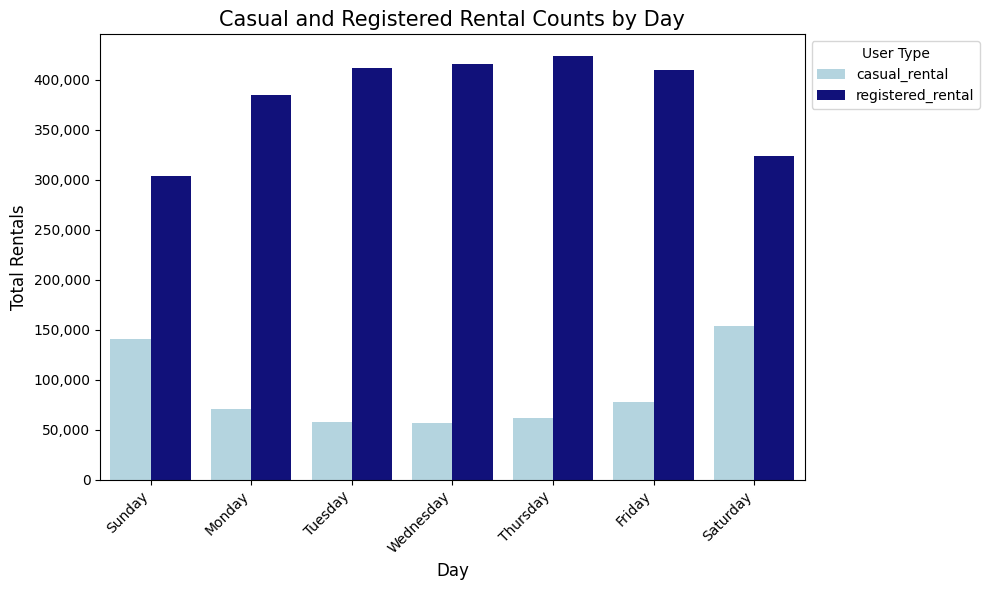

In [267]:
#menghitung total casual dan registered berdasarkan hari
daily_sum = cust_type_df.groupby('weekday',observed=False).agg({
    'casual_sum': 'sum',
    'registered_sum': 'sum'
}).reindex(weekday_order)

#dataframe baru
byday_df = pd.DataFrame({
    'weekday': weekday_order,
    'casual_rental': daily_sum['casual_sum'].values,
    'registered_rental': daily_sum['registered_sum'].values
})

#mengubah format
byday_melted = byday_df.melt(id_vars='weekday',
                             value_vars=['casual_rental', 'registered_rental'],
                             var_name='user_type',
                             value_name='rental_count')

#membuat barchart
plt.figure(figsize=(10, 6))

#membuat grouped barchart
sns.barplot(
    x='weekday',
    y='rental_count',
    hue='user_type',
    data=byday_melted,
    palette=['lightblue', 'darkblue']
)

#judul dan tampilan barchart
plt.title('Casual and Registered Rental Counts by Day', fontsize=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(rotation=45, ha="right")

#legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='User Type')

#format angka pada y agar ribuan dan tidak le6
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

#menyesuaikan layout agar tidak terpotong
plt.tight_layout()

#menampilkan barchart
plt.show()


**Insight:**
- Jumlah penyewa registered selalu lebih besar dibandingkan casual pada tiap harinya.
- Penyewa registered paling banyak menyewa pada hari Kamis, sedangkan casual pada hari Sabtu diikuti dengan Minggu.
- Penyewa registered paling sedikit menyewa pada hari Minggu, sedangkan casual pada hari Rabu dan Selasa.

### Pertanyaan 6, 7, 8: Kapan terakhir kali sepeda disewa? Hari apa sepeda paling sering disewa? Bagaimana total penyewaan di setiap harinya?

<ipython-input-268-541e45d7ae3a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="recency", x="weekday", data=recency_df, palette=colors, ax=ax[0], ci=None)
<ipython-input-268-541e45d7ae3a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="weekday", data=recency_df, palette=colors, ax=ax[0], ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

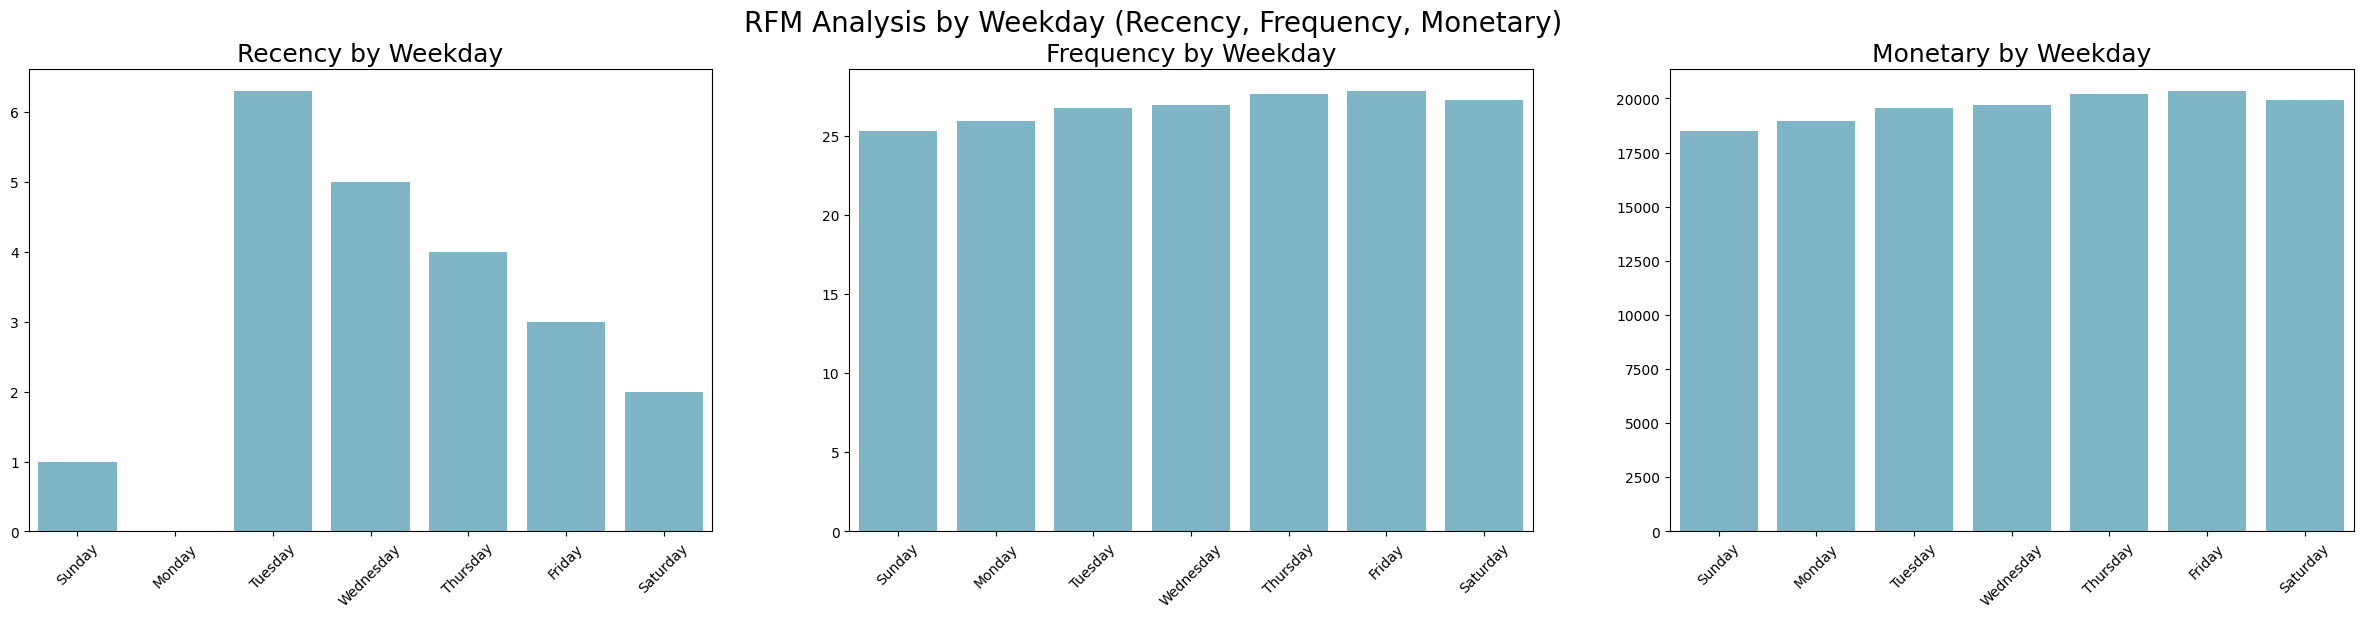

In [268]:
#3 subplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

#warna yang digunakan
colors = ["#72BCD4"] * 7

#visualisasi recency
sns.barplot(y="recency", x="weekday", data=recency_df, palette=colors, ax=ax[0], ci=None)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency by Weekday", loc="center", fontsize=18)
ax[0].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)

#visualisasi frequency
sns.barplot(y="frequency", x="weekday", data=recency_df, palette=colors, ax=ax[1], ci=None)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency by Weekday", loc="center", fontsize=18)
ax[1].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)

#visualisasi monetary
sns.barplot(y="monetary", x="weekday", data=recency_df, palette=colors, ax=ax[2], ci=None)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary by Weekday", loc="center", fontsize=18)
ax[2].set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)

#judul dan tampilan barchart
plt.suptitle("RFM Analysis by Weekday (Recency, Frequency, Monetary)", fontsize=20)

#menampilkan barchart
plt.show()


**Insight:**
- Hari selasa memiliki nilai recency tertinggi artinya lebih sering terjadi transaksi penyewaan terakhir yang terjadi pada hari ini.
- Hari Minggu (bukan nol seperti monday) memiliki nilai recency yang paling rendah.
- Frequency tidak ada perbedaan signifikan antara satu hari dengan hari lainnya, begitu juga dengan monetary.

## Mengunduh df menjadi csv untuk digunakan pada pembuatan dashboard

In [269]:
daily_hours_df.to_csv("/content/sample_data/daily_hours_df.csv", index=False)
hours_df.to_csv("/content/sample_data/hours_df.csv", index=False)
cust_type_df.to_csv("/content/sample_data/cust_type_df.csv", index=False)
day_type_hours_df.to_csv("/content/sample_data/day_type_hours_df.csv", index=False)

**Insight:**
- Akan menghasilkan 4 file csv, yaitu daily_hours_df.csv, hours_df.csv, cust_type_df.csv, day_type_hours_df.csv.
- Df recency_df tidak diunduh karena akan menggunakan hours_df langsung pada pembuatan dashboard namun dengan fungsi yang sama dengan recency_df.

## Analisis Lanjutan (Opsional)

## Conclusion

- Jika melihat seluruh data, penyewaan sepeda terbesar terjadi pada hari Jumat dan jumlah penyewaan terendah pada hari Minggu. Artinya, aktivitas penyewaan sepeda lebih dominan pada akhir pekan seperti hari Jumat. Untuk hari weekend, hari Sabtu yang lebih sibuk dibandingkan Minggu. Waktu puncak penyewaan terjadi pada pukul 17, diikuti pukul 18 dan 8 yang bertepatan dengan jam-jam masyarakat memulai dan mengakhiri aktivitas harian, seperti bekerja. Sebaliknya, sangat sedikit penyewaan pada pukul 0-5 mengingat aktivitas masyarakat yang minim pada jam-jam tersebut.
- Penyewaan sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan 2011, dengan puncak penyewaan tertinggi di bulan Juni untuk tahun 2011 dan September untuk 2012. Bulan Januari merupakan periode dengan penyewaan terendah untuk kedua tahun tersebut. Jam penyewaan tertinggi tetap konsisten di kedua tahun pada pukul 17, 18, dan 8, sedangkan waktu penyewaan terendah terjadi pada tengah malam hingga menjelang pagi.
- Penyewaan sepeda pada hari kerja (weekday) sering terjadi pada pukul 8, 17, dan 18, yang mencerminkan pola aktivitas rutin masyarakat. Namun, pada akhir pekan (weekend), puncak penyewaan terjadi antara pukul 11 hingga 16. Jumlah penyewa pada pukul 0 tetap rendah kecuali pada Sabtu dan Minggu yang memiliki aktivitas lebih banyak pada tengah malam dibandingkan dengan hari kerja.
- Pada hari kerja, penyewaan terbesar terjadi pada pukul 17, 18, dan 8 sementara pada akhir pekan, aktivitas penyewaan memuncak pada pukul 13, 12, dan 14. Hal ini menunjukkan perbedaan kebiasaan masyarakat untuk menyewa sepeda antara hari kerja dan akhir pekan.
- Penyewa registered (terdaftar) lebih dominan dibandingkan penyewa casual (tidak terdaftar) setiap harinya. Penyewa registered paling aktif pada hari Kamis, sementara penyewa casual lebih aktif pada hari Sabtu dan Minggu. Penyewaan registered paling sedikit terjadi pada hari Minggu, sedangkan penyewaan casual cenderung rendah pada hari Rabu dan Selasa.
- Hari Selasa memiliki nilai recency tertinggi yang menunjukkan bahwa transaksi terakhir penyewaan sering terjadi pada hari tersebut. Sebaliknya, hari Minggu memiliki nilai recency terendah yang menandakan lebih sedikit transaksi terakhir yang terjadi pada hari ini. Dari segi frequency dan monetary, tidak ada perbedaan signifikan antara satu hari dengan hari lainnya.

